<a href="https://colab.research.google.com/github/ssubbinn/BAEKJOON/blob/main/%ED%9A%8C%EA%B7%80_%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 소개

회귀 : 여러 개의 독립변수(X) 와 한 개의 종속변수(Y) 간의 상관관계를 모델링하는 기법 통칭

머신러닝 회귀 예측의 핵심 -> 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

**지도학습의 두가지 유형 회귀, 분류**

차이점 : 분류는 예측값이 카테고리와 같은 이산형 클래스 값, 회귀는 연속형 숫자 값

<대표적인 선형 회귀 모델>

- 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)

- 릿지(Ridge) : 선형회귀에 L2 규제를 추가한 회귀 모델

**L2 규제란?** 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수 값을 더 작게 만드는 규제 모델

- 라쏘(Lasso) : 선형회귀에 L1 규제를 추가한 회귀 모델

**L1 규제란?** 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것 -> 피처 선택 기능

- 엘라스틱넷(ElasticNet) : L2,L1 함께 결합한 모델. 피처가 많은 데이터 세트에 적용

- 로지스틱 회귀(Logistic Regression) : 이름은 회귀지만 분류에 사용되는 선형 모델. 성능 좋음

## 단순 선형 회귀를 통한 회귀 이해

단순선형회귀 : 독립 변수, 종속 변수 모두 하나


f(x) = W0 +W1*x +(오류)

MAE : 오류에 절댓값 취해서 더한 것
RSS : 오류 값의 제곱을 구해서 더하는 방식

-> RSS를 최소로 하는 W0, W1를 구하는 것이 목적

<비용함수>
=손실함수

RSS(w0,w1)= 시그마(RSS)/N

## 비용 최소화하기 - 경사 하강법

경사 하강법 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

어떻게?

비용함수 미분(변수가 2개 w0, w1 이기에 편미분) -> 미분 함수의 최솟값 구하기



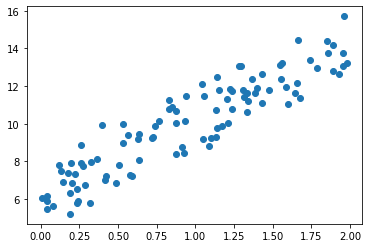

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y= 4X + 6을 근사

X= 2*np.random.rand(100,1)
y= 6+4*X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [ ]:
#get_cost() 정의

N=len(y)
def get_cost(y, y_pred):
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
#gradient_weight_update() 함수 정의 -> w1, w0 업데이트하며 비용함수 계산

#w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_update,w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0 값으로초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  #w1과 w0을 업데이트 할 w1_update, w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
  #w0과 w1을 모두 0으로 초기화
  w1=np.zeros((1,1))
  w0=np.zeros((1,1))

  #인자로 주어진iters 만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행
  for ind in range(iters):
   w1_update, w0_update= get_weight_updates(w1,w0,X,y,learning_rate=0.01)
   w1=w1-w1_update
   w0=w0-w0_update

  return w1,w0

In [ ]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1,w0=gradient_descent_steps(X,y,iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))
#실제와 비슷

w1:3.968 w0:6.222
Gradient Descent Total Cost:0.9924


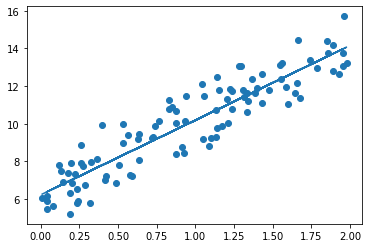

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

실전에서는 시간이 오래걸리기 때문에 확률적 경사 하강법 이용

### 회귀 평가 지표

: 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심

MAE : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것

-> 'neg_mean_absolute_error'

MSE : 실제 값과 예측값의 차이를 제곱해 평균한 것

-> 'neg_mean_squared_error'

RMSE : MSE에 루트를 씌운것
R^2 : 실제 값의 분산 대비 예측값의 분산 비율. 1에 가까울 수록 예측 정확도 높음

실습

## 다항 회귀의 과적합/과소적합 이해

다항회귀 : 2차, 3차 방정식과 같은 다항식으로 표현되는 회귀

**다항회귀는 선형 회귀이다**

- 회귀에서 선형/비선형을 나누는 기준은 **회귀 계수가 선형/비선형인지에 따른 것**이지 독립변수의 선형/비선형 여부와는 무관!



### 편향 분산 트레이드 오프



- 지나치게 한 방향으로 치우친 경향이 있으며 이런 모델을 고분산성을 가졌다고 표현

- 높은 평향/낮은 분산에서 과소적합되기 쉬우며 낮은 평향/높은 분산에서 과적합 되기 쉽다.

- 편향과 분산이 서로 프레이드 오프를 이루면서 오류 COST값이 최대로 낮아지는 모델을 구축하는 것이 가장 

### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

**규제 선형 모델의 개요**

최적 모델을 위한 cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀 계수 크기 제어


alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터

- alpha가 0이라면 비용 함수 식은 기존과 동일한 Min(RSS(W)+0)

- alpha가 무한대라면 비용 함수 식은 RSS(W)에 비해 alpha*|W값이 커지므로 W 값을 매우 작게 만들어야 cost 최소화 가능

- 즉, alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.

규제(regularizaion) : 비용함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적함을 개선하는 방식

- L2 규제 : W의 제곱에 대해 페널티 부여, L2 규제를 적용한 회귀를 릿지 회귀

- L1 규제 : W의 절댓값에 대해 페널티 부여,  L1 규제를 적용한 회귀는 리쏘 회귀
